# Шаг 1: Подготовка данных и их загрузка

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns; sns.set()
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(url, header=None, names=column_names)

data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Шаг 2: Визуализация данных

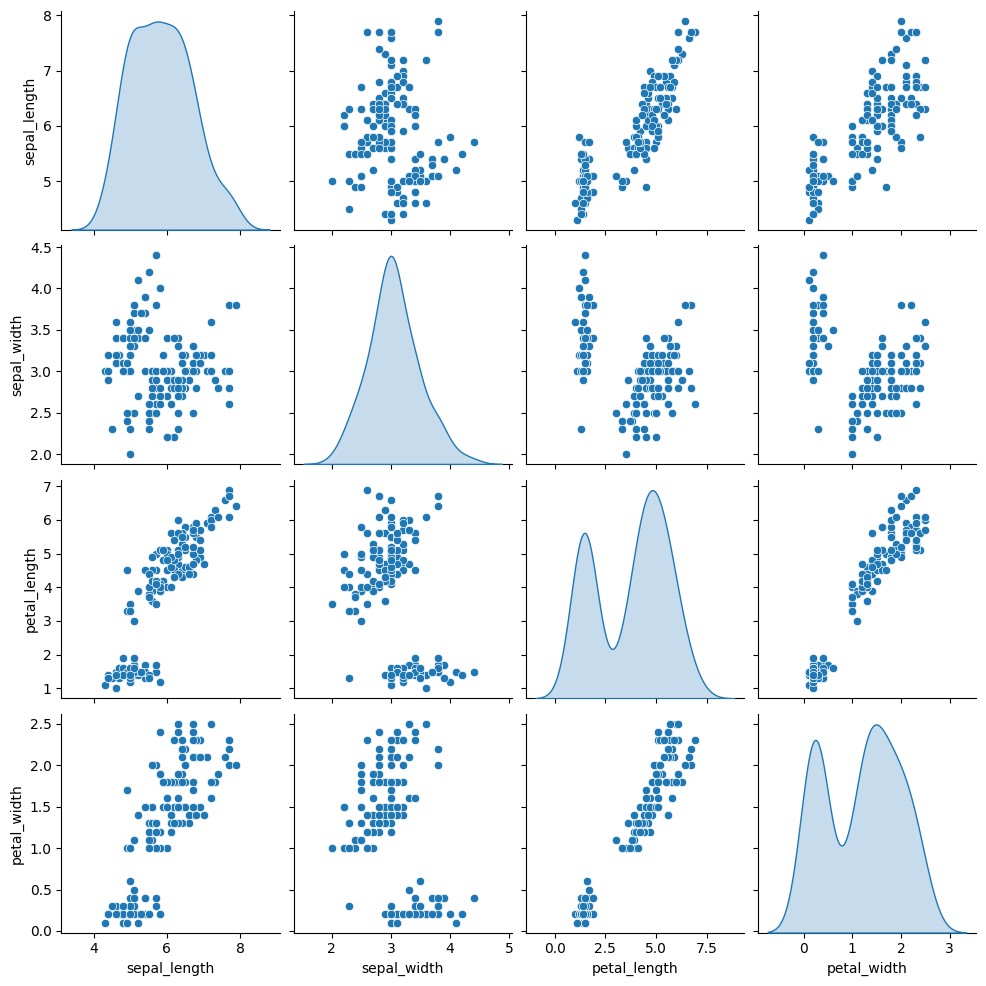

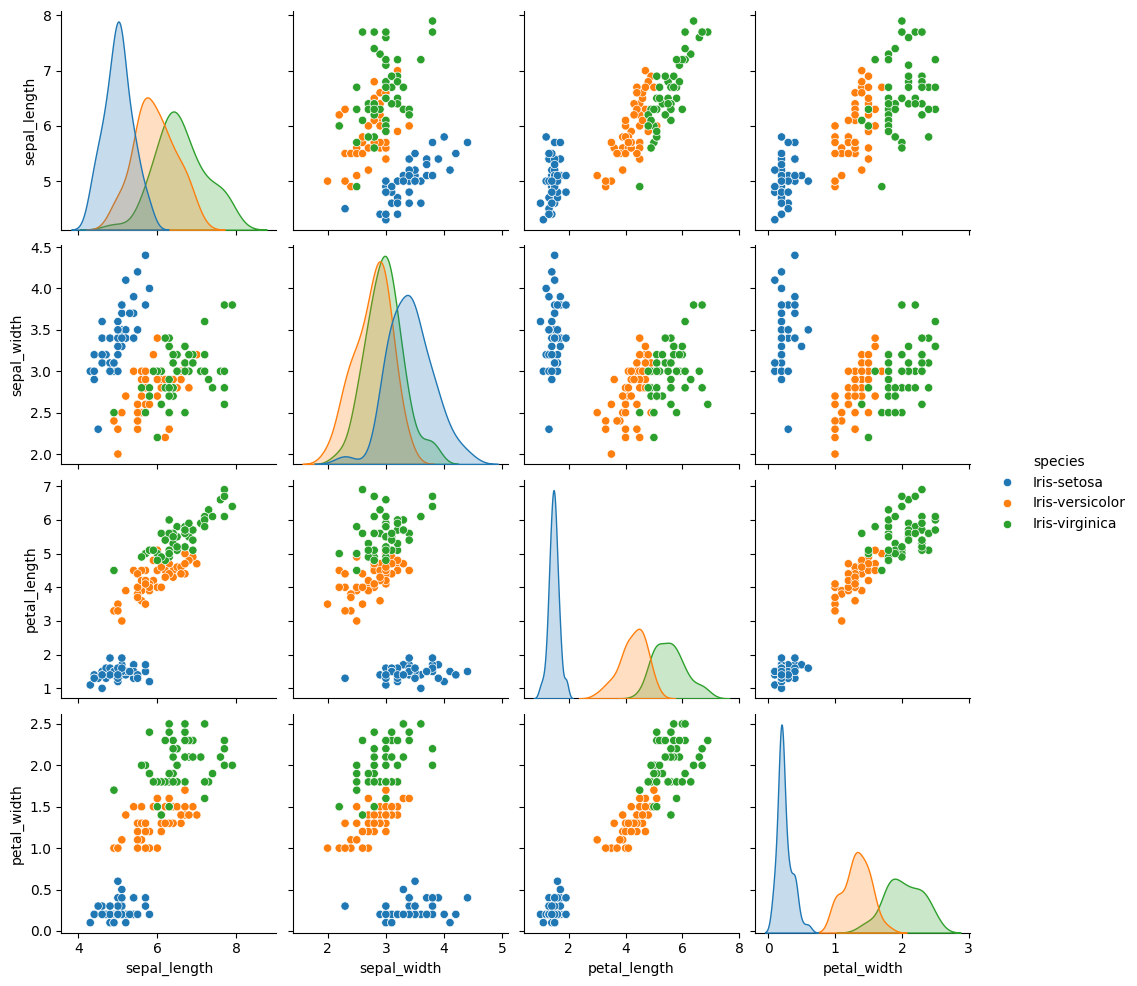

In [ ]:
sns.pairplot(data, diag_kind="kde")
plt.show()

sns.pairplot(data, hue='species', diag_kind="kde")
plt.show()

# Шаг 3: Построение модели KNN

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

Точность модели: 1.00


# Шаг 4: Оптимизация числа соседей (k)

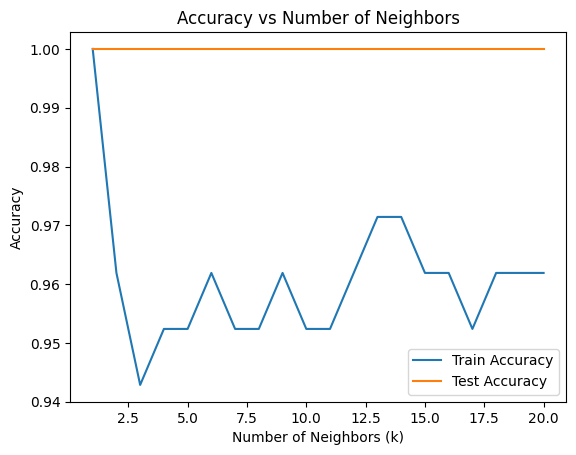

In [ ]:
neighbors = range(1, 21)
train_accuracies = []
test_accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, knn.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, knn.predict(X_test)))

plt.plot(neighbors, train_accuracies, label='Train Accuracy')
plt.plot(neighbors, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Neighbors')
plt.legend()
plt.show()


# Шаг 5: Кросс-валидация для выбора K

Оптимальное значение k: 6


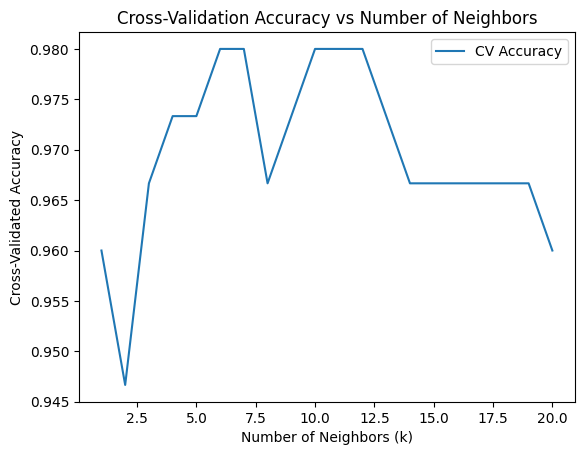

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

optimal_k = neighbors[np.argmax(cv_scores)]
print(f"Оптимальное значение k: {optimal_k}")

plt.plot(neighbors, cv_scores, label='CV Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation Accuracy vs Number of Neighbors')
plt.legend()
plt.show()


# Индивидуальное задание

1. Выполните построение модели классификации на основе метода
ближайших соседей. В ходе решения задачи необходимо решить следующие
подзадачи:

2. Построение классификатора с заданием K (количества ближайших
соседей) пользователем;

3. Вычисление оценки hold-out для различнх значений K, а также для
различных долей обучающей и тестирующей подвыборок;

4. Вычисление оценки cross validation для различных значений K, а
также для различных значений fold (количества подмножеств при кроссвалидации).

5. Вычислите оптимальные значения K. Обоснуйте свой выбор.
Продемонстрируйте использование полученного классификатора.

## Шаг 1. Загрузка и подготовка данных

In [6]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Загрузка данных прямиком с сайта
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data"
data = np.genfromtxt(url, delimiter=',', dtype=str)

# Преобразование данных в DataFrame
columns = ["class", "left-weight", "left-distance", "right-weight", "right-distance"]
df = pd.DataFrame(data, columns=columns)

# Преобразование классов в числовые значения
df['class'] = df['class'].map({'L': 0, 'B': 1, 'R': 2})

# Преобразование признаков в числовой формат
for col in df.columns[1:]:
    df[col] = df[col].astype(int)

# Разделение на признаки и целевую переменную
X = df.iloc[:, 1:]  # Признаки
y = df['class']      # Классы

# Вывод информации о данных
print(f"Размер данных: {df.shape}")
print(f"Пример данных:\n{df.head()}")




Размер данных: (625, 5)
Пример данных:
   class  left-weight  left-distance  right-weight  right-distance
0      1            1              1             1               1
1      2            1              1             1               2
2      2            1              1             1               3
3      2            1              1             1               4
4      2            1              1             1               5


## Шаг 2. Построение классификатора для заданного K

In [8]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Задание количества ближайших соседей (K)
k = 3  # Задается вручную

# Построение модели
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Предсказания и оценка точности
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели при K={k}: {accuracy:.2f}")



Точность модели при K=3: 0.80


## Шаг 3. Оценка hold-out для различных значений K и долей выборок

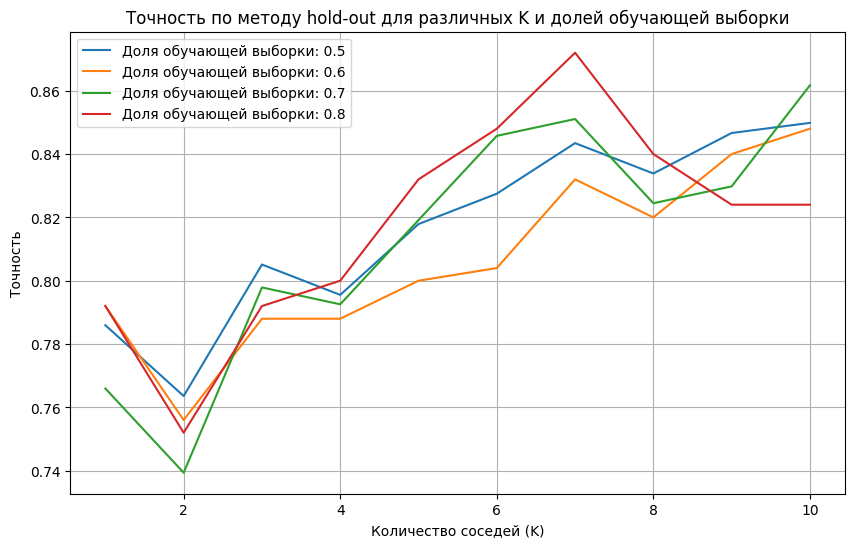

In [ ]:
# Настройка диапазонов K и долей выборок
k_values = range(1, 11)  # Значения K от 1 до 10
train_sizes = [0.5, 0.6, 0.7, 0.8]  # Доли обучающей выборки
results_holdout = {}

# Оценка hold-out
for train_size in train_sizes:
    accuracies = []
    for k in k_values:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_size, random_state=42)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    results_holdout[train_size] = accuracies

# Построение графика hold-out
plt.figure(figsize=(10, 6))
for train_size, accuracies in results_holdout.items():
    plt.plot(k_values, accuracies, label=f'Доля обучающей выборки: {train_size}')
plt.xlabel('Количество соседей (K)')
plt.ylabel('Точность')
plt.title('Точность по методу hold-out для различных K и долей обучающей выборки')
plt.legend()
plt.grid()
plt.show()



## Шаг 4. Оценка cross-validation для различных значений K и fold

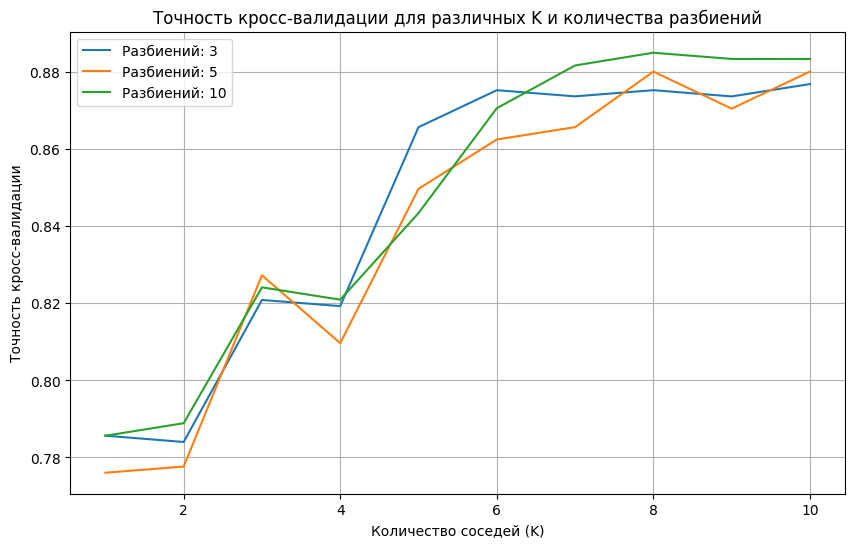

In [ ]:
# Настройка количества разбиений
folds = [3, 5, 10]
results_cv = {}

# Оценка cross-validation
for fold in folds:
    accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        cv = StratifiedKFold(n_splits=fold, shuffle=True, random_state=42)
        scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
        accuracies.append(scores.mean())
    results_cv[fold] = accuracies

# Построение графика cross-validation
plt.figure(figsize=(10, 6))
for fold, accuracies in results_cv.items():
    plt.plot(k_values, accuracies, label=f'Разбиений: {fold}')
plt.xlabel('Количество соседей (K)')
plt.ylabel('Точность кросс-валидации')
plt.title('Точность кросс-валидации для различных K и количества разбиений')
plt.legend()
plt.grid()
plt.show()

## Шаг 5. Выбор оптимального значения K

In [ ]:
# Поиск оптимального K для каждого fold
optimal_k = {}
for fold, accuracies in results_cv.items():
    optimal_k[fold] = k_values[np.argmax(accuracies)]

print("\nОптимальные значения K для разных folds:")
for fold, k in optimal_k.items():
    print(f"Разбиений={fold}: Оптимальные значения K={k}")


Оптимальные значения K для разных folds:
Разбиений=3: Оптимальные значения K=10
Разбиений=5: Оптимальные значения K=8
Разбиений=10: Оптимальные значения K=8


## Шаг 6. Демонстрация работы классификатора с оптимальным K

In [ ]:
# Выбираем оптимальное K (например, для 5-кратной кросс-валидации)
best_k = optimal_k[5]
knn_final = KNeighborsClassifier(n_neighbors=best_k)

# Финальная модель
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_final)

print(f"\nФинальная точность модели при K={best_k}: {final_accuracy:.2f}")


Финальная точность модели при K=8: 0.84
